In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as cn
import cmath
import scienceplots

plt.style.use(['science','nature'])
#plt.style.use('science')
plt.rcParams.update({'figure.dpi': '1000'})

In [57]:
# define the ellipticity
def ellipticity(theta,w_c,w_p,w_i):
    u = (w_c/w_i)**2
    v = (w_p/w_i)**2
    b = (u**(1/2)*np.sin(theta)**2)/(2*np.cos(theta)*(1-v))
    alpha = -b**(-1)*(1 + (1 + b**(-2))**(1/2))**(-1)
    return alpha, b

In [58]:
# constants and variables in CGS units

m_e = cn.m_e*1000 # in grams
c = cn.c * 100 # in cm/s
e = cn.e*(1/3.336)*10**10 # in ESU
pi = cn.pi
evtoerg = 1.6021772e-12	 # ev to erg
a_f = 7.29735308e-3	# fine structure constant
h = 6.6261e-27 # planck's constant
hbar = 1.0546e-27 # reduced planck's constant

# define the variables
n_e = 5*10**21 # number density, cm^-3
B = 4.141*10**12 # the magnetic field, in Gauss
B_c = 4.141*10**13 # the critical magnetic field, in Gauss

w_p = np.sqrt((4*pi*e**2*n_e)/m_e) # the plasma frequency
w_c = (w_p**2/10**(-7))**(1/2)  # cyclotron frequency

In [59]:
w_i = np.geomspace(0.1*w_c, 10*w_c, 120) # range for incident frequency

In [60]:
gamma_r = (2/3)*(e**2*w_i)/(m_e*c**3)
u = (w_c/w_i)**2
v = (w_p/w_i)**2

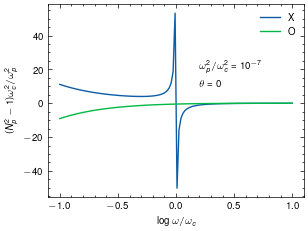

In [61]:
# theta = 0

n10 = ((1 - (w_p**2/w_i**2)*(w_i/(w_i - w_c))) - 1)*(w_c/w_p)**2 # extra-ordinary
n20 = ((1 - (w_p**2/w_i**2)*(w_i/(w_i + w_c))) - 1)*(w_c/w_p)**2 # ordinary

plt.plot(np.emath.logn(10, w_i/w_c), n10, label='X')
plt.plot(np.emath.logn(10, w_i/w_c), n20, label='O')
plt.xlabel(r'$\log \omega/\omega_c$')
plt.ylabel(r'$(N_p^2 -1)\omega_c^2/\omega_p^2$')
plt.annotate(r"$\omega_p^2/\omega_c^2 = 10^{-7}$", (0.2,20))
plt.annotate(r"$\theta = 0$", (0.2,10))
plt.legend()
plt.savefig('ref_ind_t0.eps',format='eps', dpi=1000)

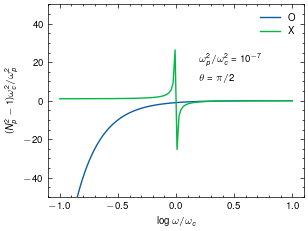

In [62]:
# theta = pi/2

n190 = ((1 - (w_p**2/w_i**2)) - 1)*(w_c/w_p)**2 # extraordinary
n290 = ((((w_i**2-w_p**2)**2 - w_i**2*w_c**2)/((w_i**2-w_c**2-w_p**2)*w_i**2)) - 1)*(w_c/w_p)**2 # ordinary

plt.plot(np.emath.logn(10, w_i/w_c), n190, label='O')
plt.plot(np.emath.logn(10, w_i/w_c), n290, label='X')
plt.xlabel(r'$\log \omega/\omega_c$')
plt.ylabel(r'$(N_p^2 -1)\omega_c^2/\omega_p^2$')
plt.annotate(r"$\omega_p^2/\omega_c^2 = 10^{-7}$", (0.2,20))
plt.annotate(r"$\theta = \pi/2$", (0.2,10))
plt.ylim(-50,50)
plt.legend()
plt.savefig('ref_ind_t90.eps',format='eps', dpi=1000)

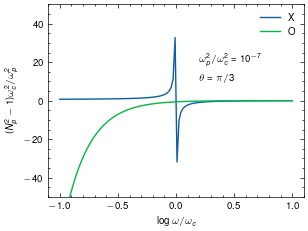

In [63]:
# theta = 60

angles = 60

# K,e+,e-,ez for extraordinary mode
# choose phi = pi/4
alpha, b = ellipticity(angles*np.pi/180,w_c,w_p,w_i)
K1 = b*(1 - (1 + b**(-2))**(1/2))
C1 = (1 + K1**2)**(-1/2)
e_z1 = C1*K1*np.sin(angles*np.pi/180)
e_p1 = 2**(-1/2)*C1*np.exp(-1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) + 1)
e_m1 = 2**(-1/2)*C1*np.exp(1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) - 1)

# K,e+,e-,ez for ordinary mode
K2 = b*(1 + (1 + b**(-2))**(1/2))
C2 = (1 + K2**2)**(-1/2)
e_z2 = C2*K2*np.sin(angles*np.pi/180)
e_p2 = 2**(-1/2)*C2*np.exp(-1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) + 1)
e_m2 = 2**(-1/2)*C2*np.exp(1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) - 1)

n160 = -v*((1 + K1**2)**(-1))*((K1*np.sin(angles*np.pi/180))**2*(1 + 1j*gamma_r)**(-1) + 0.5*(1-K1*np.cos(angles*np.pi/180))**2*(1 - u**(1/2) + 1j*gamma_r)**(-1) + 0.5*(1-K1*np.cos(angles*np.pi/180))**2*(1 + u**(1/2) + 1j*gamma_r)**(-1))
n260 = -v*((1 + K2**2)**(-1))*((K2*np.sin(angles*np.pi/180))**2*(1 + 1j*gamma_r)**(-1) + 0.5*(1-K2*np.cos(angles*np.pi/180))**2*(1 - u**(1/2) + 1j*gamma_r)**(-1) + 0.5*(1-K2*np.cos(angles*np.pi/180))**2*(1 + u**(1/2) + 1j*gamma_r)**(-1))

real_n160 = n160.real*(w_c/w_p)**2
real_n260 = n260.real*(w_c/w_p)**2

scross_160 = ((1/(1+u**(1/2))**2)*np.abs(e_p1)**2 + (1/((1-u**(1/2))**2 + gamma_r**2))*np.abs(e_m1)**2 + np.abs(e_z1)**2)
scross_260 = (1/(1+u**(1/2))**2)*np.abs(e_p2)**2 + (1/((1-u**(1/2))**2 + gamma_r**2))*np.abs(e_m2)**2 + np.abs(e_z2)**2

plt.plot(np.emath.logn(10, w_i/w_c), real_n160, label='X')
plt.plot(np.emath.logn(10, w_i/w_c), real_n260, label='O')
plt.xlabel(r'$\log \omega/\omega_c$')
plt.ylabel(r'$(N_p^2 -1)\omega_c^2/\omega_p^2$')
plt.annotate(r"$\omega_p^2/\omega_c^2 = 10^{-7}$", (0.2,20))
plt.annotate(r"$\theta = \pi/3$", (0.2,10))
plt.ylim(-50,50)
plt.legend()
plt.savefig('ref_ind_t60.eps',format='eps', dpi=1000)

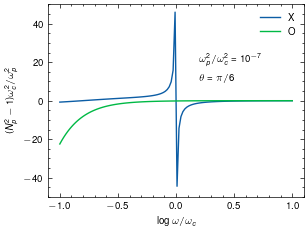

In [64]:
# theta = 30

angles = 30

# K,e+,e-,ez for extraordinary mode
# choose phi = pi/4
alpha, b = ellipticity(angles*np.pi/180,w_c,w_p,w_i)
K1 = b*(1 - (1 + b**(-2))**(1/2))
C1 = (1 + K1**2)**(-1/2)
e_z1 = C1*K1*np.sin(angles*np.pi/180)
e_p1 = 2**(-1/2)*C1*np.exp(-1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) + 1)
e_m1 = 2**(-1/2)*C1*np.exp(1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) - 1)


# K,e+,e-,ez for ordinary mode
K2 = b*(1 + (1 + b**(-2))**(1/2))
C2 = (1 + K2**2)**(-1/2)
e_z2 = C2*K2*np.sin(angles*np.pi/180)
e_p2 = 2**(-1/2)*C2*np.exp(-1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) + 1)
e_m2 = 2**(-1/2)*C2*np.exp(1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) - 1)

n130 = -v*((1 + K1**2)**(-1))*((K1*np.sin(angles*np.pi/180))**2*(1 + 1j*gamma_r)**(-1) + 0.5*(1-K1*np.cos(angles*np.pi/180))**2*(1 - u**(1/2) + 1j*gamma_r)**(-1) + 0.5*(1-K1*np.cos(angles*np.pi/180))**2*(1 + u**(1/2) + 1j*gamma_r)**(-1))
n230 = -v*((1 + K2**2)**(-1))*((K2*np.sin(angles*np.pi/180))**2*(1 + 1j*gamma_r)**(-1) + 0.5*(1-K2*np.cos(angles*np.pi/180))**2*(1 - u**(1/2) + 1j*gamma_r)**(-1) + 0.5*(1-K2*np.cos(angles*np.pi/180))**2*(1 + u**(1/2) + 1j*gamma_r)**(-1))

real_n130 = n130.real*(w_c/w_p)**2
real_n230 = n230.real*(w_c/w_p)**2

scross_130 = ((1/(1+u**(1/2))**2)*np.abs(e_p1)**2 + (1/((1-u**(1/2))**2 + gamma_r**2))*np.abs(e_m1)**2 + np.abs(e_z1)**2)
scross_230 = (1/(1+u**(1/2))**2)*np.abs(e_p2)**2 + (1/((1-u**(1/2))**2 + gamma_r**2))*np.abs(e_m2)**2 + np.abs(e_z2)**2

plt.plot(np.emath.logn(10, w_i/w_c), real_n130, label='X')
plt.plot(np.emath.logn(10, w_i/w_c), real_n230, label='O')
plt.xlabel(r'$\log \omega/\omega_c$')
plt.ylabel(r'$(N_p^2 -1)\omega_c^2/\omega_p^2$')
plt.annotate(r"$\omega_p^2/\omega_c^2 = 10^{-7}$", (0.2,20))
plt.annotate(r"$\theta = \pi/6$", (0.2,10))
plt.ylim(-50,50)
plt.legend()
plt.savefig('ref_ind_t30.eps',format='eps', dpi=1000)

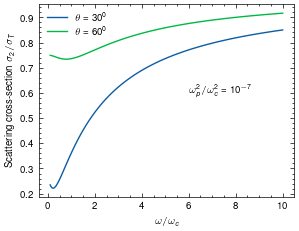

In [65]:
plt.plot(w_i/w_c, scross_230, label = r'$\theta = 30^0$')
plt.plot(w_i/w_c, scross_260, label = r'$\theta = 60^0$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Scattering cross-section $\sigma_2/\sigma_T$')
plt.annotate(r"$\omega_p^2/\omega_c^2 = 10^{-7}$", (6,0.6))
plt.legend()
plt.savefig('sigma2_3060.eps',format='eps', dpi=1000)

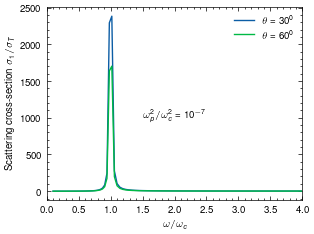

In [66]:
plt.plot(w_i/w_c, scross_130, label = r'$\theta = 30^0$')
plt.plot(w_i/w_c, scross_160, label = r'$\theta = 60^0$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Scattering cross-section $\sigma_1/\sigma_T$')
plt.annotate(r"$\omega_p^2/\omega_c^2 = 10^{-7}$", (1.5,1000))
plt.xlim(0,4)
plt.legend()
plt.savefig('sigma1_3060.eps',format='eps', dpi=1000)

In [67]:
w_i = w_c*10**(-1)
w_p = np.sqrt((4*pi*e**2*n_e)/m_e) # the plasma frequency
w_c = (w_p**2/10**(-7))**(1/2)  # cyclotron frequency
angles = np.linspace(0.1,90,100)

u = (w_c/w_i)**2
v = (w_c/w_i)**2
gamma_r = (2/3)*(e**2*w_i)/(m_e*c**3)

# K,e+,e-,ez for extraordinary mode
# choose phi = pi/4
alpha, b = ellipticity(angles*np.pi/180,w_c,w_p,w_i)
K1 = b*(1 - (1 + b**(-2))**(1/2))
C1 = (1 + K1**2)**(-1/2)
e_z1 = C1*K1*np.sin(angles*np.pi/180)
e_p1 = 2**(-1/2)*C1*np.exp(-1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) + 1)
e_m1 = 2**(-1/2)*C1*np.exp(1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) - 1)

# K,e+,e-,ez for ordinary mode
K2 = b*(1 + (1 + b**(-2))**(1/2))
C2 = (1 + K2**2)**(-1/2)
e_z2 = C2*K2*np.sin(angles*np.pi/180)
e_p2 = 2**(-1/2)*C2*np.exp(-1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) + 1)
e_m2 = 2**(-1/2)*C2*np.exp(1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) - 1)

scross_1t = ((1/(1+u**(1/2))**2)*np.abs(e_p1)**2 + (1/((1-u**(1/2))**2 + gamma_r**2))*np.abs(e_m1)**2 + np.abs(e_z1)**2)
scross_2t = (1/(1+u**(1/2))**2)*np.abs(e_p2)**2 + (1/((1-u**(1/2))**2 + gamma_r**2))*np.abs(e_m2)**2 + np.abs(e_z2)**2

In [68]:
w_i = w_c*10
w_p = np.sqrt((4*pi*e**2*n_e)/m_e) # the plasma frequency
w_c = (w_p**2/10**(-7))**(1/2)  # cyclotron frequency
angles = np.linspace(0.1,90,100)

u = (w_c/w_i)**2
v = (w_c/w_i)**2
gamma_r = (2/3)*(e**2*w_i)/(m_e*c**3)

# K,e+,e-,ez for extraordinary mode
# choose phi = pi/4
alpha, b = ellipticity(angles*np.pi/180,w_c,w_p,w_i)
K1 = b*(1 - (1 + b**(-2))**(1/2))
C1 = (1 + K1**2)**(-1/2)
e_z1 = C1*K1*np.sin(angles*np.pi/180)
e_p1 = 2**(-1/2)*C1*np.exp(-1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) + 1)
e_m1 = 2**(-1/2)*C1*np.exp(1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) - 1)

# K,e+,e-,ez for ordinary mode
K2 = b*(1 + (1 + b**(-2))**(1/2))
C2 = (1 + K2**2)**(-1/2)
e_z2 = C2*K2*np.sin(angles*np.pi/180)
e_p2 = 2**(-1/2)*C2*np.exp(-1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) + 1)
e_m2 = 2**(-1/2)*C2*np.exp(1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) - 1)

scross_1tw = ((1/(1+u**(1/2))**2)*np.abs(e_p1)**2 + (1/((1-u**(1/2))**2 + gamma_r**2))*np.abs(e_m1)**2 + np.abs(e_z1)**2)
scross_2tw = (1/(1+u**(1/2))**2)*np.abs(e_p2)**2 + (1/((1-u**(1/2))**2 + gamma_r**2))*np.abs(e_m2)**2 + np.abs(e_z2)**2

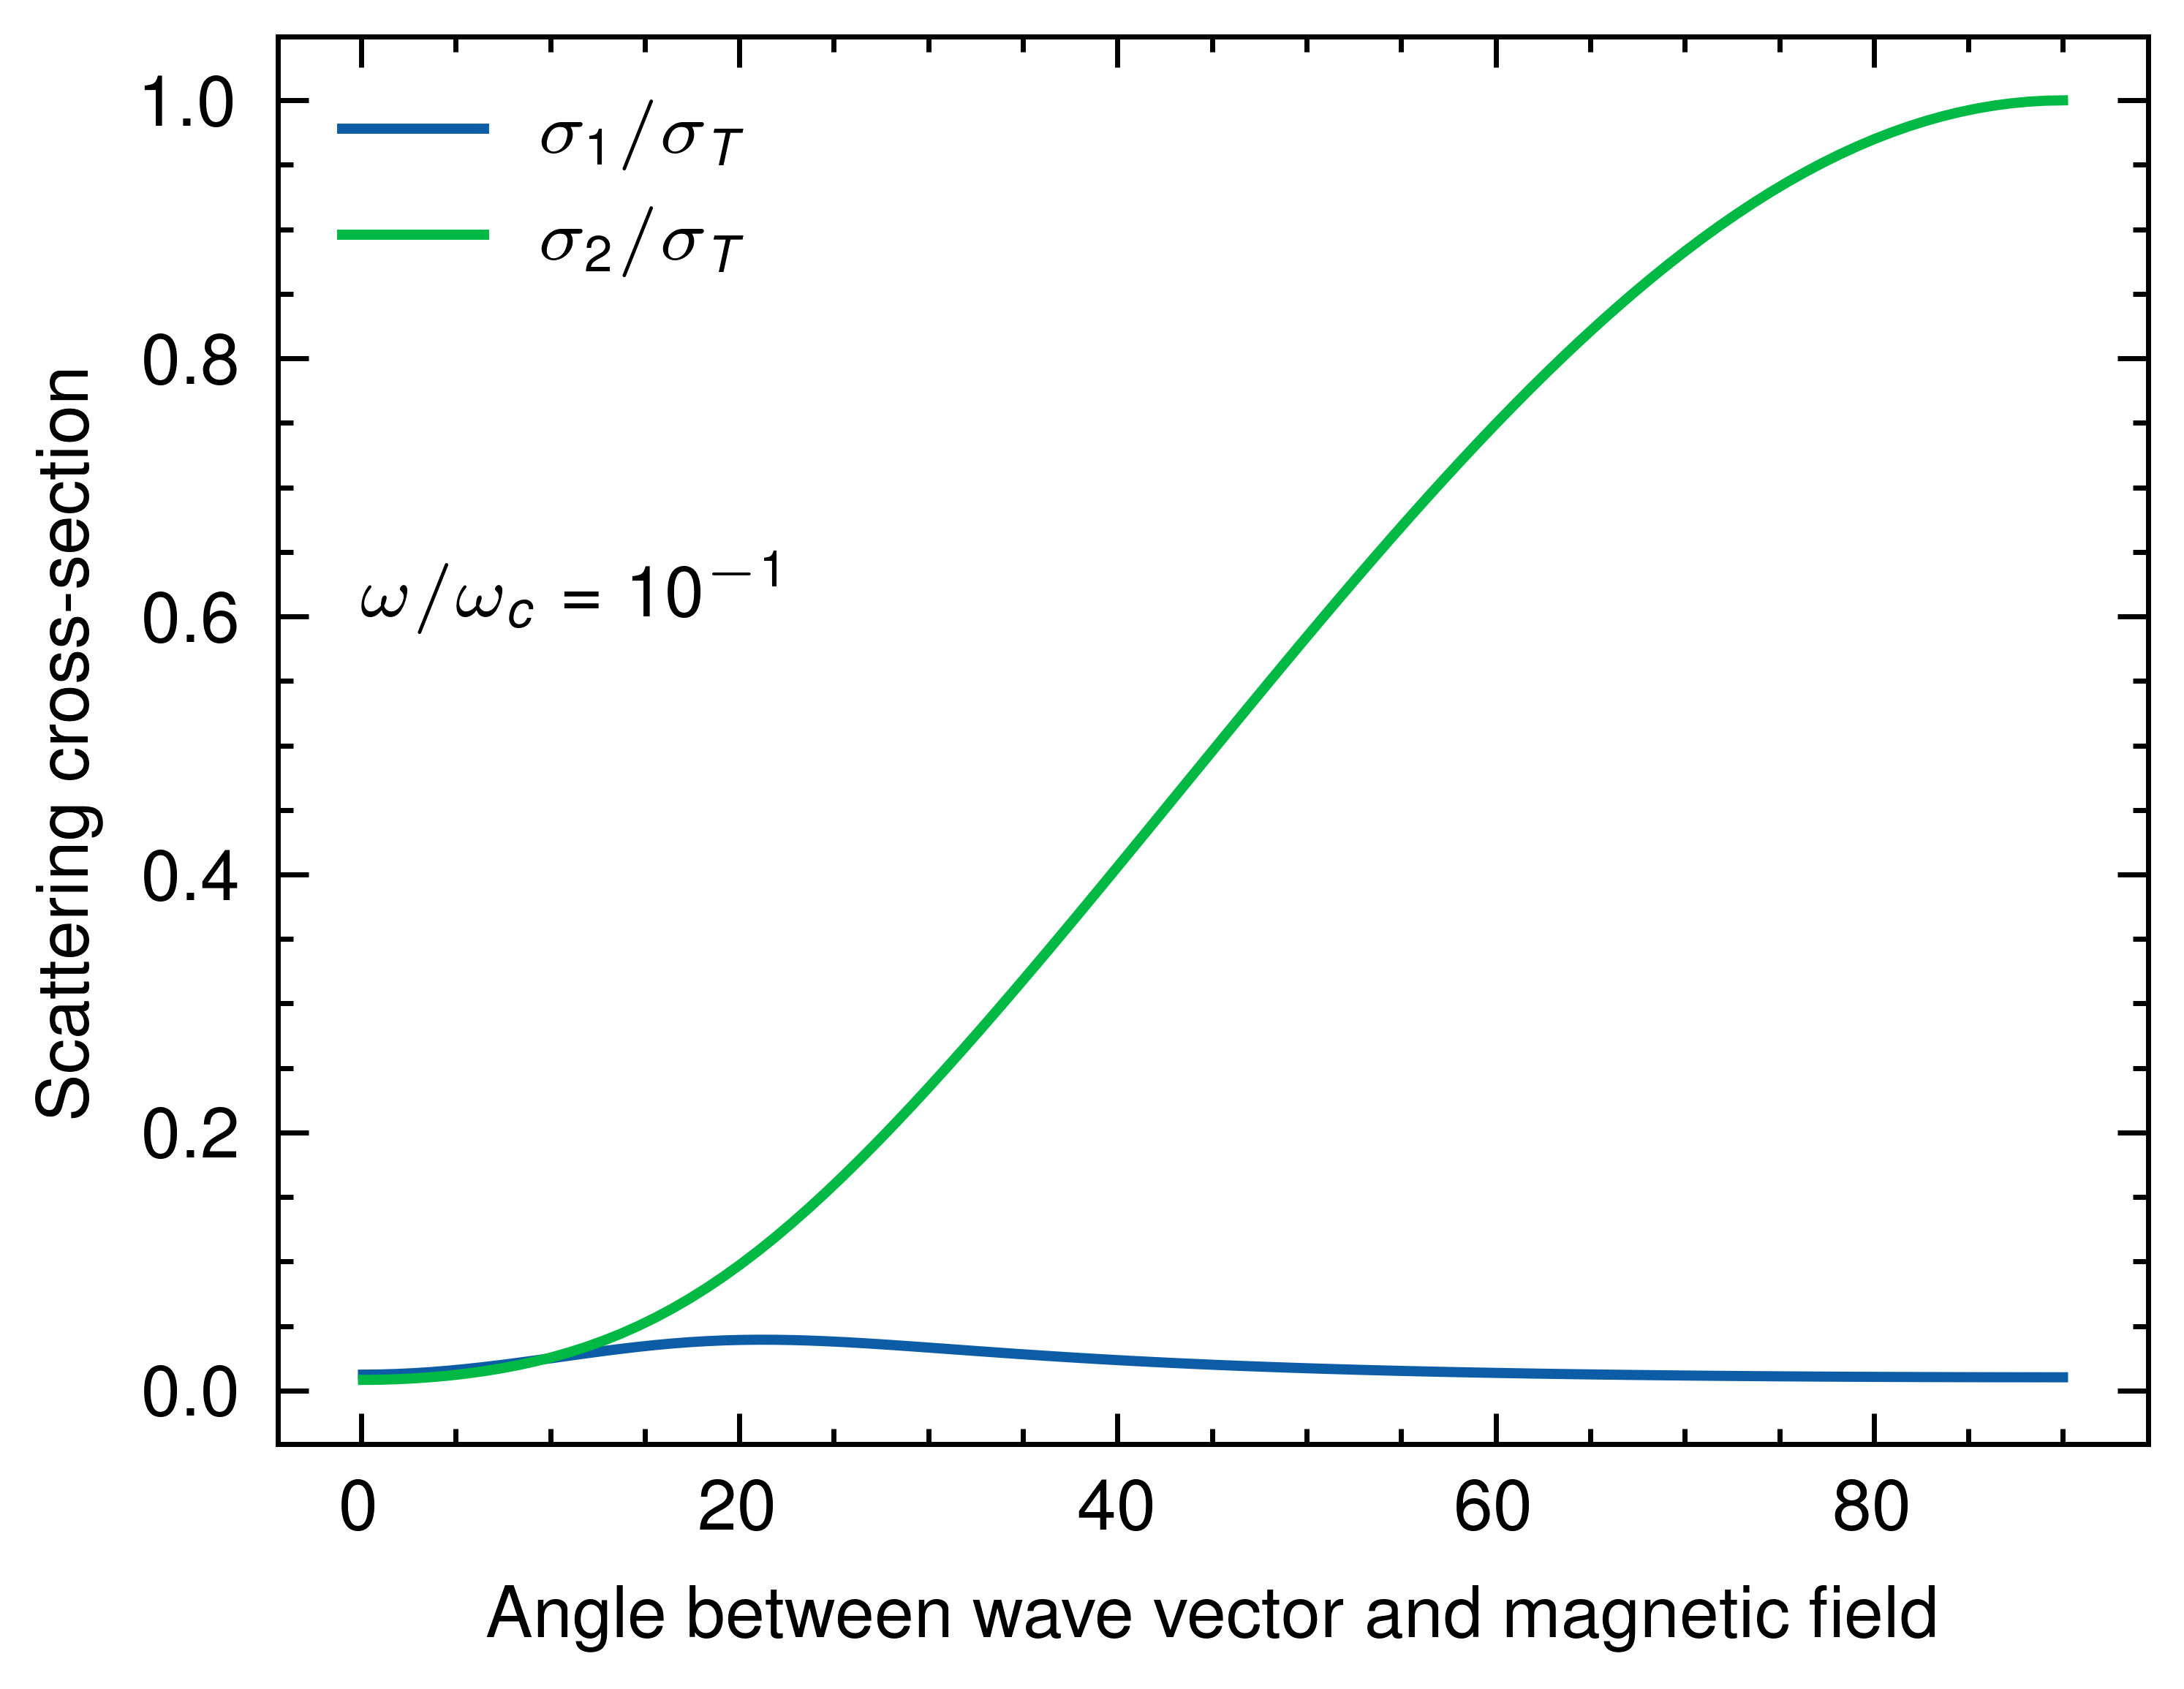

In [75]:
plt.plot(angles, scross_1t, label = r'$\sigma_1/\sigma_T$')
plt.plot(angles, scross_2t, label = r'$\sigma_2/\sigma_T$')
plt.xlabel(r'Angle between wave vector and magnetic field')
plt.ylabel(r'Scattering cross-section')
plt.annotate(r"$\omega/\omega_c = 10^{-1}$", (0,0.6))
plt.savefig('sigma_wwc01.eps',format='eps', dpi=1000)
plt.legend()

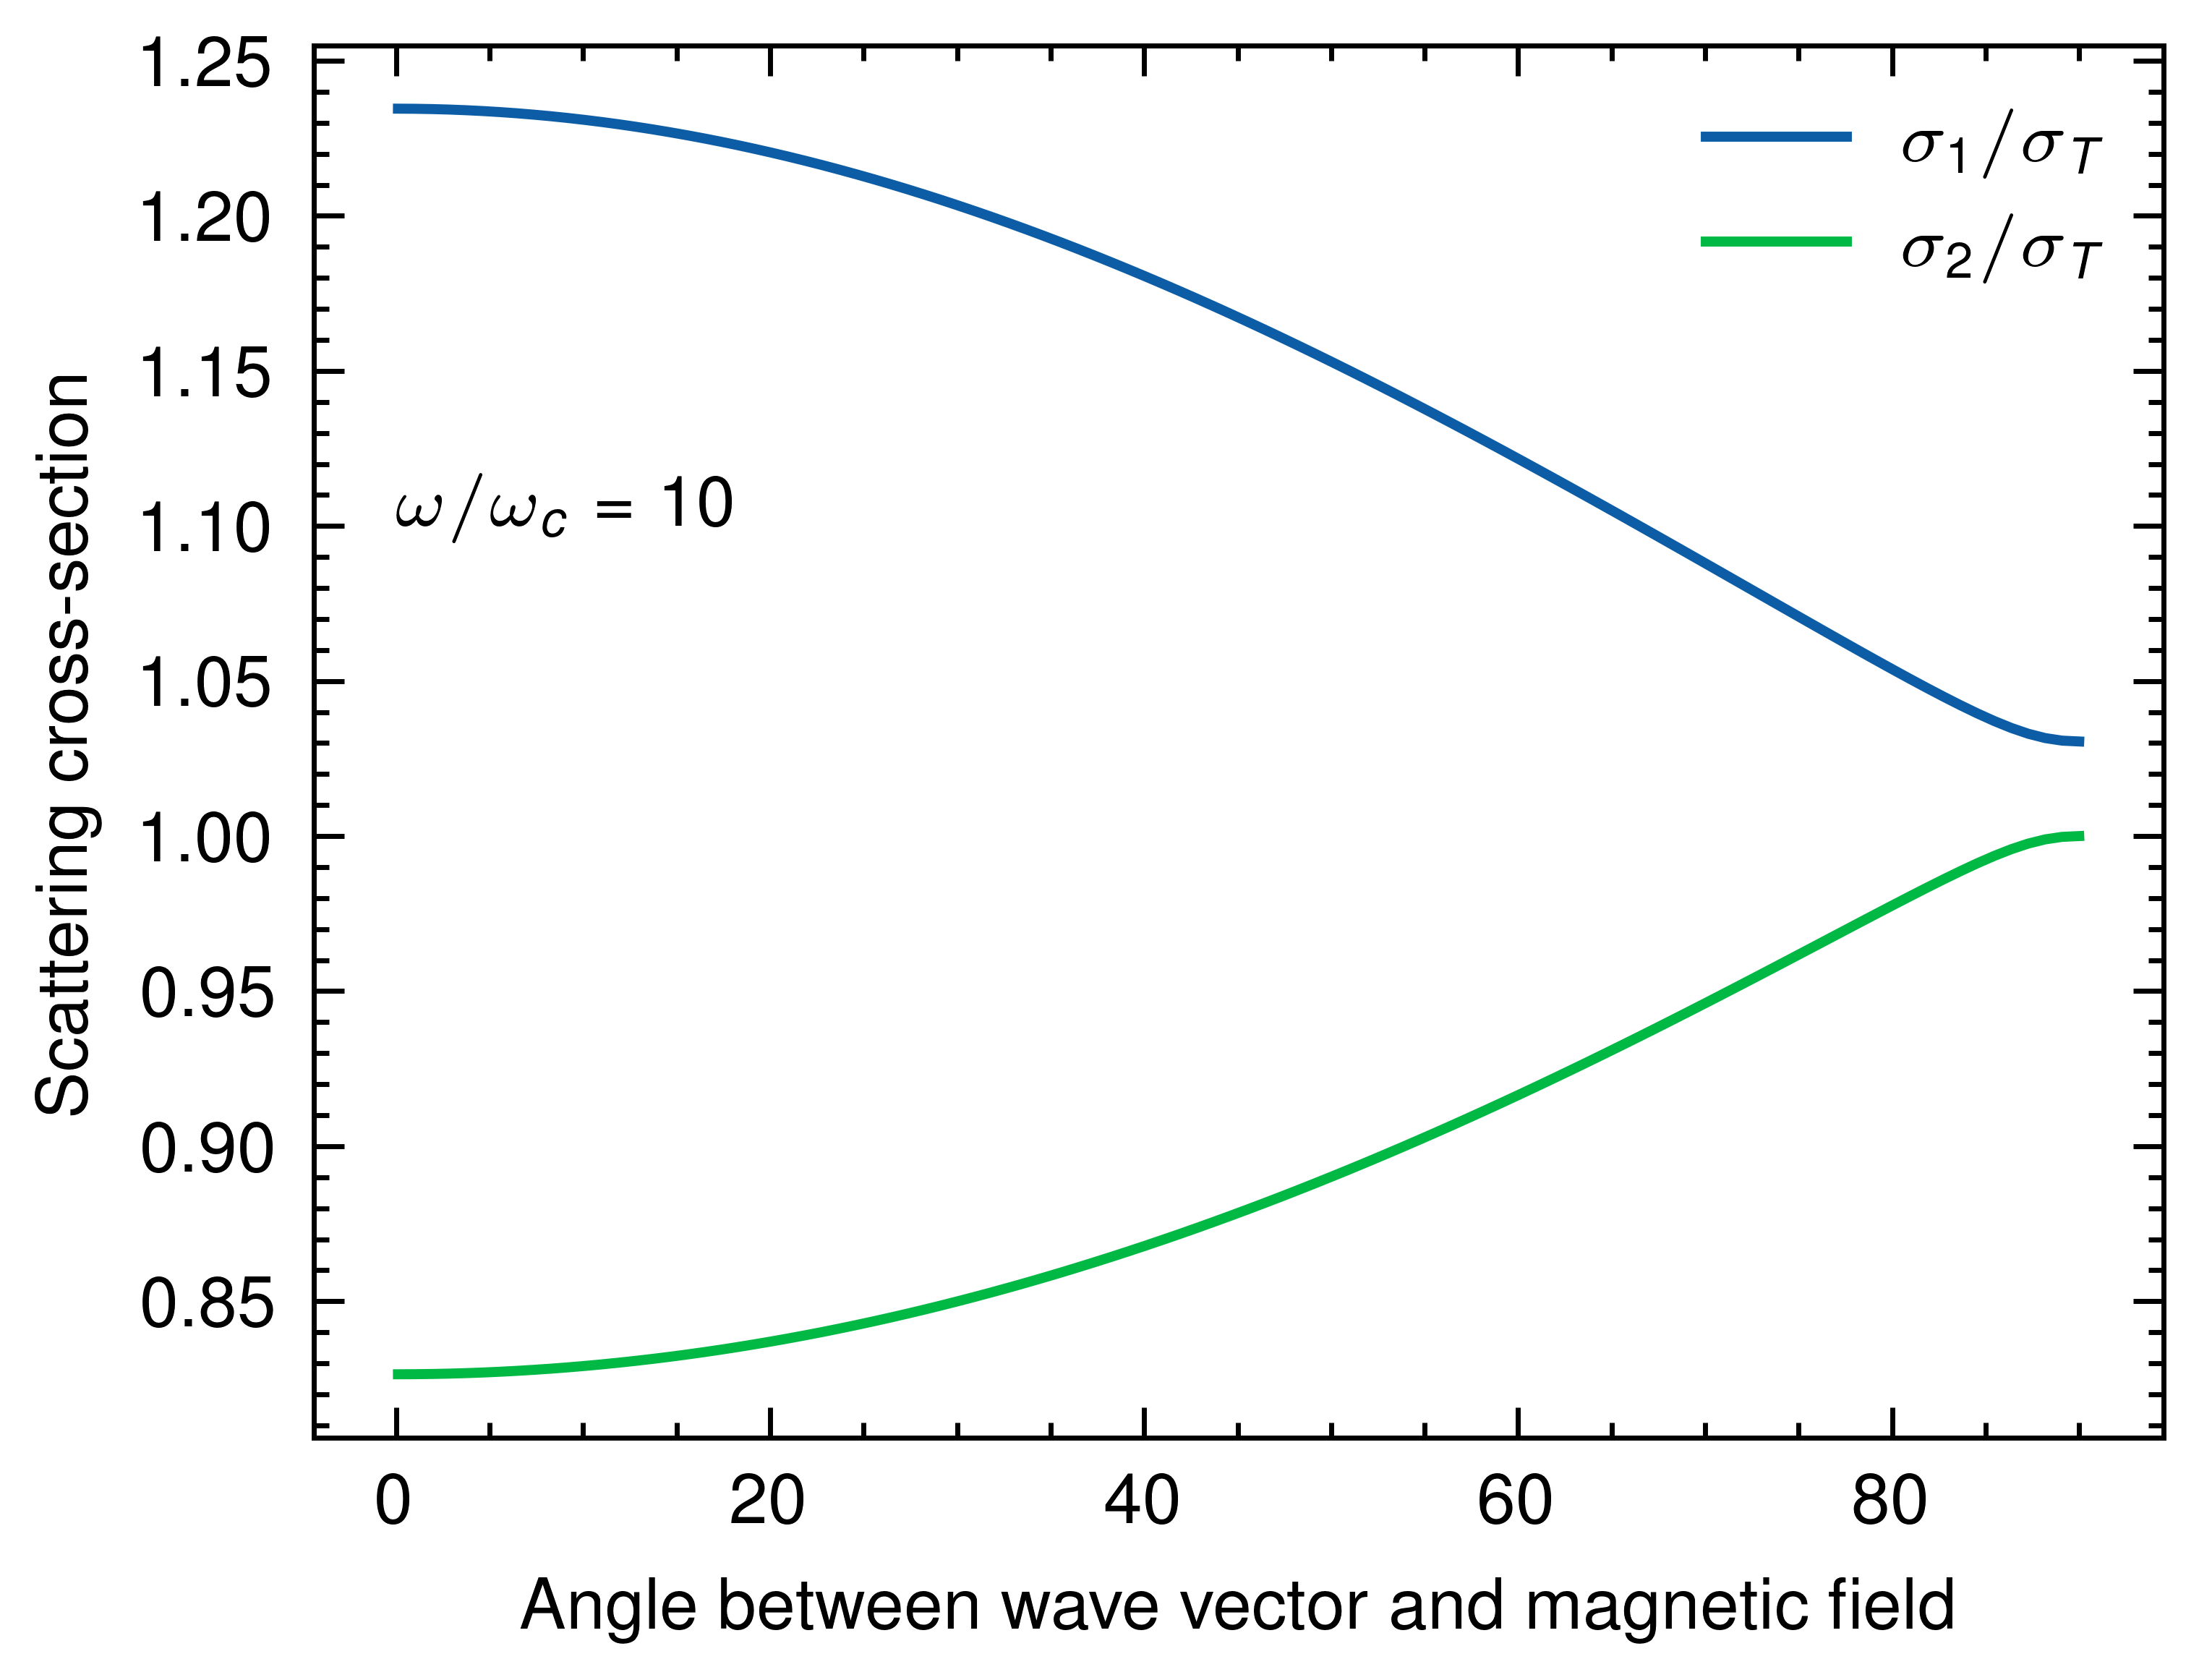

In [76]:
plt.plot(angles, scross_1tw, label = r'$\sigma_1/\sigma_T$')
plt.plot(angles, scross_2tw, label = r'$\sigma_2/\sigma_T$')
plt.xlabel(r'Angle between wave vector and magnetic field')
plt.ylabel(r'Scattering cross-section')
plt.annotate(r"$\omega/\omega_c = 10$", (0,1.1))
plt.savefig('sigma_wwc10.eps',format='eps', dpi=1000)
plt.legend()

In [71]:
angles = np.linspace(0.1,90,100)
print(w_c)
w_i = np.geomspace(10**(-5)*w_c,1000*w_c,9)

1.2613330868325749e+19


In [72]:
(w_p/w_i)**2

array([1.e+03, 1.e+01, 1.e-01, 1.e-03, 1.e-05, 1.e-07, 1.e-09, 1.e-11,
       1.e-13])

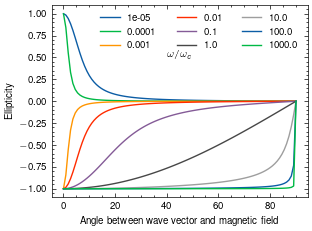

In [73]:
for freq in w_i:
    ellipn,b = ellipticity(angles*np.pi/180,w_c,w_p,freq)
    # plt.plot(ellipn, label=rf'{np.round(freq/w_c, 5)}')
    plt.plot(angles, ellipn, label=f'{np.round(freq/w_c,5)}')
plt.xlabel(r'Angle between wave vector and magnetic field')
plt.annotate(r"$\omega/\omega_c$", (40,0.5))
plt.ylabel(r'Ellipticity')
plt.legend(loc='upper right', ncol=3)
plt.savefig('ellipwwc.eps',format='eps', dpi=1000)